<a href="https://colab.research.google.com/github/fedhere/DSPS/blob/master/HW5/BuildingsEnergyOwners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -- link google drive
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# -- useful imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scipy as sp
from scipy import stats

# data retrival
### LL84
get the Local Law 84 (ll84) data from the URL: https://data.cityofnewyork.us/api/views/8u86-bviy/rows.csv and read it in with Pandas

### Pluto
Download the pluto csv data and store it in your google drive. 

You can find the data here 
https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page

IMPORTANT: store it in the path *drive/My Drive/dsps/ with the name pluto_18v2_1.csv*

This path and name have to be exact. This way the grader and I will be able to run your notebook without changing anything as long as we also have stored the data in path drive/My Drive/dsps/pluto_18v2_1.csv. This is part of the _reproducibility_ requirement.

In [0]:
#delete
# -- set the location of the Local Law 84 file
ll84_name = "https://data.cityofnewyork.us/api/views/8u86-bviy/rows.csv"

# -- read in the Local Law 84 csv file
ll84 = pd.read_csv(ll84_name)

# -- select only Local Law 84 rows with Manhattan as borough
ll84 = ll84[ll84.Borough == "Manhattan"]

In [0]:
#delete
# -- set the location of the PLUTO file
pl_name = "drive/My Drive/dsps/pluto_18v2_1.csv"

# -- read in the PLUTO file
pluto = pd.read_csv(pl_name, low_memory=False)

# data fusion

### select data
select the data for buildings _in the borough of Manhattan_ only from the pluto file (you can do it broadcasting!)

### merge
merge the pluto and ll84 dataframes. you will have to choose an appropriate column that both datasets share fo do so. The column may not have the same nbame, but should have the same _variable_.

In [88]:
#delete
ll84.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weath

In [89]:
#delete
pluto.columns

Index(['borough', 'block', 'lot', 'cd', 'ct2010', 'cb2010', 'schooldist',
       'council', 'zipcode', 'firecomp', 'policeprct', 'healtharea',
       'sanitboro', 'sanitsub', 'address', 'zonedist1', 'zonedist2',
       'zonedist3', 'zonedist4', 'overlay1', 'overlay2', 'spdist1', 'spdist2',
       'spdist3', 'ltdheight', 'splitzone', 'bldgclass', 'landuse',
       'easements', 'ownertype', 'ownername', 'lotarea', 'bldgarea', 'comarea',
       'resarea', 'officearea', 'retailarea', 'garagearea', 'strgearea',
       'factryarea', 'otherarea', 'areasource', 'numbldgs', 'numfloors',
       'unitsres', 'unitstotal', 'lotfront', 'lotdepth', 'bldgfront',
       'bldgdepth', 'ext', 'proxcode', 'irrlotcode', 'lottype', 'bsmtcode',
       'assessland', 'assesstot', 'exemptland', 'exempttot', 'yearbuilt',
       'yearalter1', 'yearalter2', 'histdist', 'landmark', 'builtfar',
       'residfar', 'commfar', 'facilfar', 'borocode', 'bbl', 'condono',
       'tract2010', 'xcoord', 'ycoord', 'zonemap', '

In [0]:
#delete
# -- select only PLUTO buildings in Manhattan
pluto = pluto[pluto.borough == "MN"]

ll84pl = ll84.merge(pluto, left_on="BBL - 10 digits", 
                    right_on="bbl", how="outer")

# data exploration and cleaning

### extact columns
extract the columns listed in the file "columns.txt" from the dataset.

convert the resulting dataset to numerical, converting non-numerical values to NaN. drop rows that contain invalid values and save the resulting dataframe (_reducted_ dataframe)

In [97]:
#delete
goodcols = np.array(pd.read_csv(
    "https://raw.githubusercontent.com/fedhere/DSPS/master/HW5/columns.txt").
                    values).flatten()
len(goodcols)

21

In [98]:
#delete
ll84pl_reduct = ll84pl[goodcols].copy()
for c  in goodcols:
    ll84pl[c] = pd.to_numeric(ll84pl[c], errors='coerce')    
    ll84pl_reduct[c] = pd.to_numeric(ll84pl[c], errors='coerce')    
ll84pl_reduct.dropna(inplace=True)
ll84pl_reduct.describe().shape, len(goodcols)

((8, 21), 21)

### Assess imact 
Describe the  datasets resulting from this data cleaning: 

- how many observations have you lost? 

- did any of the features (=columns) have inconsistent distribution between the full and reducted dataset? 

You can approach this question in a number of ways, and you have done this in the  homewors already (with a KS test, and by just looking at uncertainties are two examples of ways to do ut that you worked out in HW3 and HW4, the Z test might work if you can convince yourself that the full sample is the "population" - up to you! a quick google search would probably describe many more ways). Choose _2_ ways, describe what each does and why it is appropriate. Compare the results (indeed I did it in 4 ways and did not always get consistent results! each of these meathods measures a slightly different thing).



In [99]:
ll84pl[goodcols].describe()

,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
count,5176.000000,5176.000000,5176.000000,4057.000000,5122.000000,4619.000000,4899.000000,4070.000000,4619.000000,5.101000e+03,5.160000e+03,5.176000e+03,3.388000e+03,3388.000000,5122.000000,4.290000e+04,42844.000000,42844.000000,42898.000000,42898.000000,42898.000000
mean,1943.956723,1.056221,98.469861,58.689426,252.626045,266.941373,10.414227,0.411818,381.910067,8.584119e+06,4.704265e+03,2.088364e+05,1.481517e+04,94.268548,364.565502,4.301289e+04,1.113762,5.872763,22.280876,25.351858,1055.207096
std,33.123462,0.773553,8.486776,30.809480,3124.750511,3277.960226,58.764605,2.624555,3987.815401,2.498918e+07,8.912783e+04,3.109891e+05,1.483005e+05,1126.541657,3802.615408,1.664784e+05,1.383727,6.189731,92.373077,95.386177,993.277780
min,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1920.000000,1.000000,100.000000,33.000000,61.900000,64.800000,4.800000,0.000000,110.750000,1.540483e+06,4.000250e+02,7.230700e+04,2.375100e+03,22.580000,106.800000,4.390000e+03,1.000000,3.000000,1.000000,2.000000,0.000000
50%,1930.000000,1.000000,100.000000,66.000000,77.200000,80.800000,7.300000,0.300000,143.100000,3.180848e+06,6.545500e+02,1.150115e+05,4.327050e+03,35.925000,139.300000,8.875000e+03,1.000000,5.000000,6.000000,8.000000,1968.000000
75%,1967.000000,1.000000,100.000000,85.000000,98.400000,102.000000,12.400000,0.600000,188.100000,7.265680e+06,1.292225e+03,2.136252e+05,8.308225e+03,53.855000,184.975000,2.321050e+04,1.000000,6.000000,18.000000,20.000000,1988.000000
max,2016.000000,35.000000,100.000000,100.000000,126307.400000,126307.400000,4074.900000,131.000000,152001.300000,1.037256e+09,4.764456e+06,8.942176e+06,6.376003e+06,57699.300000,152001.300000,1.343508e+07,159.000000,104.000000,8764.000000,8812.000000,2018.000000


In [100]:
#delete
ll84pl_reduct.describe()

,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
count,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2.044000e+03,2044.000000,2.044000e+03,2.044000e+03,2044.000000,2044.000000,2.044000e+03,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000
mean,1944.097358,1.026419,99.060665,57.454501,179.519472,182.952446,10.828376,0.347701,282.695205,7.417714e+06,1727.084393,1.834298e+05,1.520801e+04,86.745225,280.406898,1.743071e+05,1.136497,14.504892,86.314579,99.047456,1094.831703
std,34.124614,0.367935,5.202529,30.424238,3024.806998,3024.763020,90.161639,0.386811,3746.045382,2.721299e+07,14586.701420,2.516655e+05,1.228927e+05,488.899493,3749.437950,2.334882e+05,0.695738,9.104346,123.580062,125.353668,989.810792
min,1827.000000,1.000000,0.000000,1.000000,2.600000,2.600000,0.000000,0.000000,5.600000,1.501000e+02,12.000000,1.995400e+04,0.000000e+00,0.000000,6.200000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1920.000000,1.000000,100.000000,33.000000,63.700000,66.700000,4.500000,0.000000,109.800000,1.384589e+06,385.100000,6.933925e+04,2.506025e+03,25.217500,106.425000,6.563200e+04,1.000000,8.000000,0.000000,37.000000,0.000000
50%,1929.000000,1.000000,100.000000,64.000000,77.650000,81.300000,6.800000,0.300000,139.300000,2.772684e+06,604.700000,1.033400e+05,4.410800e+03,37.535000,136.500000,1.009690e+05,1.000000,12.000000,60.000000,67.000000,1980.000000
75%,1970.000000,1.000000,100.000000,83.000000,98.125000,101.625000,11.800000,0.600000,181.725000,6.004705e+06,1091.375000,1.852130e+05,8.151900e+03,56.857500,179.825000,1.779970e+05,1.000000,17.000000,104.000000,115.000000,1988.000000
max,2016.000000,12.000000,100.000000,100.000000,126307.400000,126307.400000,4074.900000,8.400000,152001.300000,1.037256e+09,567440.800000,2.577575e+06,3.414616e+06,11175.440000,152001.300000,2.689635e+06,14.000000,66.000000,1689.000000,1706.000000,2017.000000


In [130]:
print("lost buildings: ... (...\%) ")

lost buildings: ... (...\%) 


In [101]:
#delete
print("lost buildings: ", ll84pl[goodcols].shape[0] - ll84pl_reduct.shape[0], 
      "({:.2f}\%)".format((ll84pl[goodcols].shape[0] - ll84pl_reduct.shape[0]) * 100 / 
                          ll84pl[goodcols].shape[0]))

lost buildings:  40918 (95.24\%)


In [0]:
#delete
for g in goodcols:
    if np.abs(ll84pl_reduct[g].mean() - ll84pl[g].mean())  >\
                ll84pl_reduct[g].std() + ll84pl[g].std():
        print ("{:60}".format(g), 
               "{:.1f} +/- {:.1f} not consistent with {:.1f} +/- {:.1f}".format(
            ll84pl[g].mean(), ll84pl[g].std(), ll84pl_reduct[g].mean(), ll84pl_reduct[g].std()))

In [103]:
#delete
for g in goodcols:
    if sp.stats.ks_2samp(ll84pl_reduct[g],ll84pl[g])[1] < 0.05:
        print ("{:60}\n".format(g), 
               "         p-value {:.2f}".format(sp.stats.ks_2samp(ll84pl_reduct[g],ll84pl[g])[1]),
               "{:.1f} +/- {:.1f} not consistent with {:.1f} +/- {:.1f}".format(
            ll84pl[g].mean(), ll84pl[g].std(), ll84pl_reduct[g].mean(), ll84pl_reduct[g].std()))

Year Built                                                  
          p-value 0.00 1944.0 +/- 33.1 not consistent with 1944.1 +/- 34.1
Number of Buildings - Self-reported                         
          p-value 0.00 1.1 +/- 0.8 not consistent with 1.0 +/- 0.4
Occupancy                                                   
          p-value 0.00 98.5 +/- 8.5 not consistent with 99.1 +/- 5.2
ENERGY STAR Score                                           
          p-value 0.00 58.7 +/- 30.8 not consistent with 57.5 +/- 30.4
Site EUI (kBtu/ft²)                                         
          p-value 0.00 252.6 +/- 3124.8 not consistent with 179.5 +/- 3024.8
Weather Normalized Site EUI (kBtu/ft²)                      
          p-value 0.00 266.9 +/- 3278.0 not consistent with 183.0 +/- 3024.8
Weather Normalized Site Electricity Intensity (kWh/ft²)     
          p-value 0.00 10.4 +/- 58.8 not consistent with 10.8 +/- 90.2
Weather Normalized Site Natural Gas Intensity (therms/ft²)  
     

In [104]:
#delete
for g in goodcols:
    z = np.abs(ll84pl_reduct[g].mean() - ll84pl[g].mean()) / (ll84pl[g].std() /
                                                              np.sqrt(len(ll84pl_reduct[g])))
    if z > 2:
        print ("{:40}\n".format(g), 
               "           z={:.2f} {:.1f} +/- {:.1f} not consistent with {:.1f} +/- {:.1f}".format(z,
            ll84pl[g].mean(), ll84pl[g].std(), ll84pl_reduct[g].mean(), ll84pl_reduct[g].std()))

Occupancy                               
            z=3.15 98.5 +/- 8.5 not consistent with 99.1 +/- 5.2
Electricity Use - Grid Purchase (kBtu)  
            z=2.11 8584119.0 +/- 24989175.8 not consistent with 7417714.2 +/- 27212995.0
Property GFA - Self-Reported (ft²)      
            z=3.69 208836.4 +/- 310989.1 not consistent with 183429.8 +/- 251665.5
bldgarea                                
            z=35.66 43012.9 +/- 166478.4 not consistent with 174307.1 +/- 233488.2
numfloors                               
            z=63.05 5.9 +/- 6.2 not consistent with 14.5 +/- 9.1
unitsres                                
            z=31.34 22.3 +/- 92.4 not consistent with 86.3 +/- 123.6
unitstotal                              
            z=34.93 25.4 +/- 95.4 not consistent with 99.0 +/- 125.4


### plot WNEC
Regardless of what you found above, plot the distribution of the _log base 10_ of the weather-normalized site energy consumption (WNEC) for all values larger than 0.1 (such that log10(min) is -1) for the _entire dataset_ and for the _reducted one_: do you think inference on this feature would be affected by this way of dealing with missing data affects the result?



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


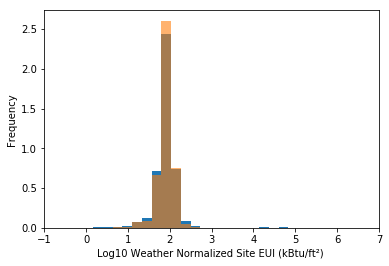

In [69]:
#delete
np.log10(ll84pl["Weather Normalized Site EUI (kBtu/ft²)"]
        ).plot(kind="hist", bins=30, density=1, range=[-1, 6])
np.log10(ll84pl_reduct["Weather Normalized Site EUI (kBtu/ft²)"]
        ).plot(kind="hist", bins=30, density=1, range=[-1, 6], alpha=0.6)
pl.xlabel("Log10 Weather Normalized Site EUI (kBtu/ft²) ");
pl.xlim(-1, 7);

# 667 and extyra credit
plot a "scatter matrix" of the selected columns. Identify 4 promising "scaling laws" and plot them separately (a scatter plot of column1 vs column2). Does it make sense that there should be a scaling law between the 2 variables? 

which features should be strongly correlated or identical but are not? discuss

([this](https://stackoverflow.com/questions/26975089/making-the-labels-of-the-scatterplot-vertical-and-horizontal-in-pandas) stackoverflow may come in handy)

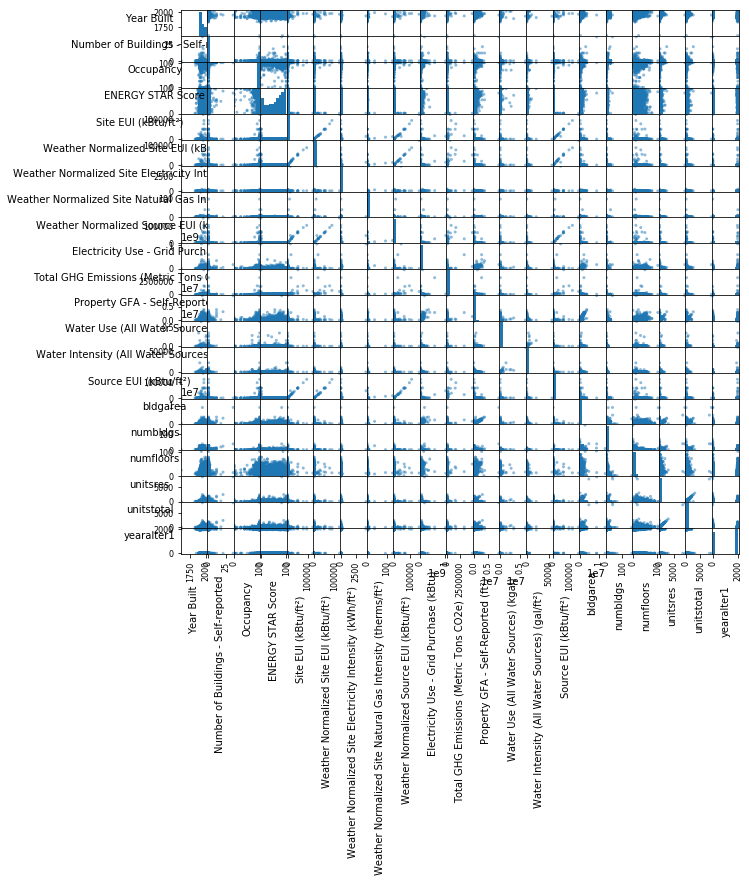

In [70]:
#delete
axs = pd.plotting.scatter_matrix(ll84pl[goodcols], figsize=(10,10));
for x in range(len(axs)):
    for y in range(len(axs)):
        if x == len(axs) - 1:
            #to make x axis name vertical  
            axs[x, y].xaxis.label.set_rotation(90)
        if y == 0:    
            axs[x, y].yaxis.label.set_rotation(0)
        

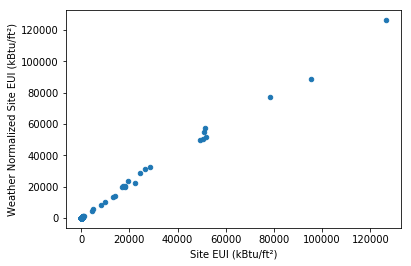

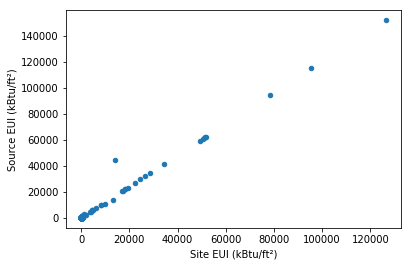

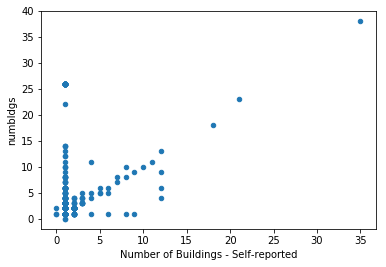

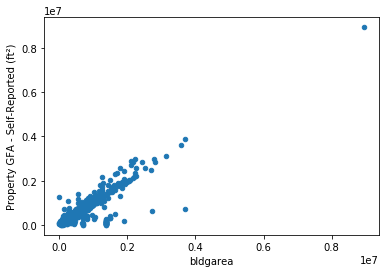

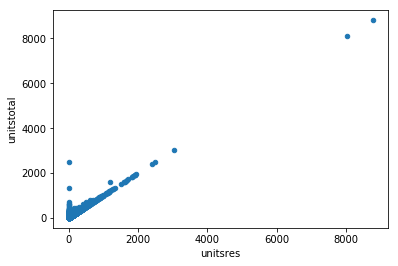

In [105]:
#delete
ll84pl.plot(x='Site EUI (kBtu/ft²)', y='Weather Normalized Site EUI (kBtu/ft²)', 
            kind='scatter')
ll84pl.plot(x='Site EUI (kBtu/ft²)', y='Source EUI (kBtu/ft²)', 
            kind='scatter')
ll84pl.plot(x='Number of Buildings - Self-reported', y='numbldgs', 
            kind='scatter')
ll84pl.plot(x='bldgarea', y='Property GFA - Self-Reported (ft²)', 
            kind='scatter')
ll84pl.plot(x='unitsres', y='unitstotal', 
            kind='scatter')

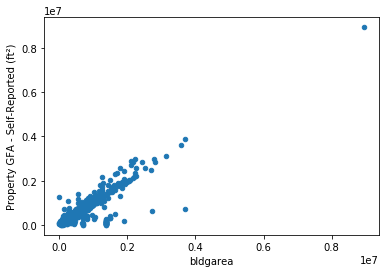

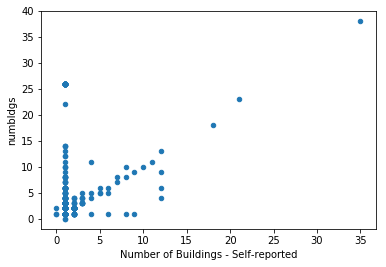

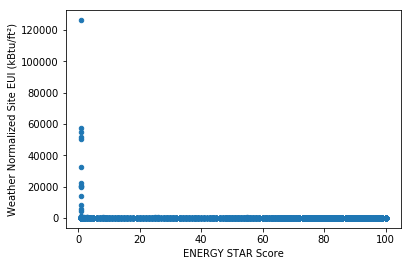

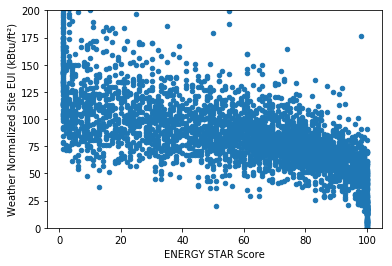

In [106]:
#delete

ll84pl.plot(x='bldgarea', y='Property GFA - Self-Reported (ft²)', 
            kind='scatter')
ll84pl.plot(x='Number of Buildings - Self-reported', y='numbldgs', kind='scatter');

ll84pl.plot(x='ENERGY STAR Score', y='Weather Normalized Site EUI (kBtu/ft²)', 
            kind='scatter');


ll84pl.plot(x='ENERGY STAR Score', y='Weather Normalized Site EUI (kBtu/ft²)', 
            kind='scatter');
pl.ylim(0, 200);

## all students
At last, from the original dataset remove only the columns that are NaN in the column "Weather Normalized Site EUI (kBtu/ft²)"


In [131]:
# -- drop buildings for which WN Site EUI is NaN
wnec = "Weather Normalized Site EUI (kBtu/ft²)"
ll84pl.dropna(subset=[wnec], inplace=True)
ll84pl.shape

(4619, 156)

In [132]:
ll84pl.describe()

,Order,Property Id,BBL - 10 digits,Street Number,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,policeprct,healtharea,sanitboro,spdist3,...,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,proxcode,lottype,bsmtcode,assessland,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,appbbl,mappluto_f,plutomapid,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,masdate,polidate
count,4619.000000,4.619000e+03,4.619000e+03,4606.000000,4.619000e+03,4.619000e+03,4619.000000,4619.000000,4619.000000,3652.000000,4619.000000,4619.000000,4607.000000,3805.000000,4619.000000,4.607000e+03,4.618000e+03,4619.000000,4.618000e+03,4.619000e+03,3.038000e+03,3038.000000,4619.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4603.000000,4603.000000,4602.000000,4602.000000,4602.000000,4602.000000,4602.000000,4602.000000,4602.000000,4602.000000,4602.000000,0.0,...,4503.000000,4.503000e+03,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4603.000000,4514.000000,4603.000000,4603.00000,4603.000000,4603.000000,4603.000000,4.603000e+03,4.603000e+03,4.603000e+03,4.603000e+03,4603.000000,4603.000000,4603.000000,4602.000000,4603.000000,4603.000000,4603.000000,4603.0,4.603000e+03,4603.000000,4602.000000,4.595000e+03,4595.000000,4.603000e+03,0.0,4603.000000,4602.000000,4602.000000,214.0,264.0,0.0,0.0
mean,3336.994371,3.528814e+06,1.012011e+09,523.056014,2.123289e+05,1.993052e+05,1944.560727,1.056289,98.625244,58.097207,257.613120,266.941373,10.525374,0.419658,381.910067,8.767355e+06,4.980836e+03,467.747110,4.512986e+03,2.109565e+05,1.512617e+04,91.782021,372.284629,40.768898,-73.973970,6.315594,4.542857,1911.335224,1201.472083,1690.871388,106.546936,129.500795,2504.708822,2.665146,4.547371,10029.113429,17.807910,4411.508692,1.002173,NaN,...,625.908505,9.326382e+03,2.003259,1.215729,15.704649,90.109059,103.677167,127.919296,144.525891,109.563852,117.03038,1.598523,3.494026,2.398001,5.130460e+06,2.788207e+07,7.817279e+05,4.771762e+06,1940.806648,1079.467304,266.524441,10.781834,6.907665,4.363719,8.659913,1.0,1.012016e+09,271.296328,1908.266623,9.914680e+05,219435.923395,2.840675e+08,NaN,1.002172,6.317471,14.501956,1.0,1.0,NaN,NaN
std,1716.322156,1.070047e+06,5.525186e+06,1310.357892,3.158335e+05,2.937886e+05,33.381412,0.786053,7.611881,30.850327,3246.850236,3277.960226,60.563720,2.709043,3987.815401,2.562632e+07,9.410245e+04,2287.676551,9.409051e+04,3.119655e+05,1.540741e+05,1121.657099,3952.159305,0.036415,0.021297,2.893859,2.445114,5199.111354,552.900574,3099.755190,5.609443,69.826560,1728.067153,1.315399,2.444790,37.279552,9.438647,1990.080636,0.046569,NaN,...,17836.082246,9.560678e+04,0.127619,1.285325,10.201658,191.677822,193.578105,93.935365,87.767960,139.529200,156.98713,1.220040,1.498847,1.481221,1.151246e+07,5.340160e+07,5.825245e+06,2.589518e+07,71.493118,991.509913,680.704064,5.820096,3.415046,5.318017,3.183317,0.0,5.528503e+06,627.263992,5185.227543,5.912442e+03,13271.328532,4.543162e+08,NaN,0.046564,2.894027,1.489986,0.0,0.0,NaN,NaN
min,1.000000,7.365000e+03,1.000048e+09,1.000000,5.002800e+04,1.680300e+04,1600.000000,0.000000,0.000000,1.000000,0.000

## Analysis: Owner investigation 
### Find owner of the single most energy consuming building

**Find owner of the single most energy consuming building**, as measured by the "Site Weather Normalized EUI per unit area ". 

**Find all the buildings that they own.**


show the weather-normalized site energy consumption and the owner name for the top 30 consuming buildings in Manhattan

In [108]:
#delete
# -- sort by WN Site EUI and print owners of top 10 energy consumers
ll84pl.sort_values(wnec, ascending=False)[[wnec, "ownername"]][:30]

,Weather Normalized Site EUI (kBtu/ft²),ownername
3606,126307.4,ST MARYS HOME FOR GIR
2972,88701.1,ROLEX RLTY CO INC
3092,77493.8,950 THIRD AVENUE LLC
2882,57361.3,"58 WEST 58TH UNITS,"
1979,54748.3,ANTHONY PAUL GIORGIO
2879,51697.6,SOLOVIEFF REALTY CO.
2848,50621.4,
3082,49620.8,136 E 56TH ST OWNERS
2974,32268.7,"MIKEONE EK EAST 53, L"
1872,31552.6,THE ABBEY CONDOMINIUM


In [0]:
#delete
highest1build = ll84pl.sort_values(wnec, 
                ascending=False)[[wnec, "ownername"]].ownername.values[0]

In [134]:
print("Owner of the hisghest consuming building:...", 
      "They own ... buildings")

Owner of the hisghest consuming building:... They own ... buildings


In [110]:
#delete
print("Owner of the hisghest consuming building:",
      ll84pl[ll84pl.ownername == highest1build]["Property Name"].values[0])

Owner of the hisghest consuming building: St. Mary's Home for Working Girls


In [111]:
#delete
print("They own {} buildings".format((
    ll84pl.ownername == ll84pl[ll84pl.ownername == 
                        highest1build]["ownername"].values[0]).sum()))


They own 1 buildings


### Find average building consumption by owner 
For all owners that own more than one building, find the average consumption for buildings owned by the same owner. Your dataframe should have 2 columns called _Weather Normalized Site EUI (kBtu/ft²)_	and _counts_

**Who owns the most energy consuming buildings on average?**

**Who owns the most buildings**

In [112]:
#delete
ll84plgroup = ll84pl[[wnec, "ownername"]].groupby("ownername")
ll84plgroup.count() > 1
ll84groupedByOwner = ll84plgroup.mean()[ll84plgroup.count() > 1].dropna(
            ).sort_values(by=wnec, ascending=False).merge(
                ll84plgroup.count()[ll84plgroup.count() > 1].dropna(
            ), left_index=True, right_index=True).rename(
columns = {wnec+"_x" : wnec, wnec+"_y" : "counts"})
ll84groupedByOwner[:10]

,Weather Normalized Site EUI (kBtu/ft²),counts
ownername,,
COLUMBIA UNIVERSITY,1459.233333,3.0
373-381 PAS ASSOCIATE,684.350000,2.0
MOUNT SINAI HOSPITAL,382.000000,2.0
PRESBYTERIAN HSP CITY,332.650000,2.0
BETH ISRAEL HOSPITAL,330.300000,2.0
NEW YORK UNIVERSITY,280.207143,42.0
78/79 YORK ASSOCIATES,256.900000,3.0
MEMORIAL SLOAN-KETTER,244.200000,2.0
THE ANIMAL MEDICAL CE,227.450000,2.0


In [113]:
#delete
ll84groupedByOwner.sort_values("counts", ascending=False)[:10]

,Weather Normalized Site EUI (kBtu/ft²),counts
ownername,,
,195.878099,484.0
TRUSTEES OF COLUMBIA,43.086667,45.0
OWNER / AGENT,85.558140,43.0
NEW YORK UNIVERSITY,280.207143,42.0
ROYAL CHARTER PROPERT,50.854545,11.0
DUNBAR OWNER LLC,121.285714,7.0
THE TRUSTEES OF COLUM,57.728571,7.0
AKAM ASSOCIATES,83.083333,6.0
YESHIVA UNIVERSITY,123.250000,6.0


In [114]:
#delete
print("{} owns the buildings that on average consume the most".format(ll84groupedByOwner.index[0]))

COLUMBIA UNIVERSITY owns the buildings that on average consume the most


In [126]:
#delete
print("{} owns the most buildings ({})".format(
    ll84groupedByOwner.sort_values("counts", ascending=False).index[1],
     ll84groupedByOwner.sort_values("counts", ascending=False).iloc[1]["counts"]))

COLUMBIA owns the most buildings (63.0)


# 667 and EC

Universities are big realtorn in NYC. The may own by different names. Find all builgings owned by NYU and COLUMBIA. replace the ownename with NYU and COLUMBIA respectively and re-aggregate the data based on these names and again find the owner of the buildings that pon average consume the most, of the highest number of buildings, and that owns the most sq footage 

In [0]:
#delete
replacelist = [c for c in set(ll84pl.ownername.dropna().values) if "COLUM" in c 
               or "Colum" in c]
ll84plr = ll84pl.replace(replacelist, "COLUMBIA")
replacelist = [c for c in set(ll84pl.ownername.dropna().values) if "NYU" in c or 
               "NEW YORK UNI"]
ll83plr = ll84plr.replace(replacelist, "NYU")



In [147]:
#delete
ll84plgroup = ll84plr[
    [wnec, "ownername"]].groupby("ownername")
ll84plgroup.count() > 1
ll84groupedByOwner = ll84plgroup.mean()[ll84plgroup.count() > 1].dropna(
            ).sort_values(by=wnec, ascending=False).merge(
                ll84plgroup.count()[ll84plgroup.count() > 1].dropna(
            ), left_index=True, right_index=True).rename(
columns = {wnec+"_x" : wnec, wnec+"_y" : "counts"})
print("{} owns the buildings that on average consume the most".format(ll84groupedByOwner.index[0]))
print("{} owns the most buildings".format(ll84groupedByOwner.sort_values("counts", ascending=False).index[1]))

ll84plgroup = ll84plr[
    ["bldgarea", "ownername"]].groupby("ownername")
ll84plgroup.count() > 1
ll84groupedByOwner = ll84plgroup.mean().dropna(
            ).sort_values(by="bldgarea", ascending=False)
print("{} owns the most area".format(ll84groupedByOwner.sort_values("bldgarea", 
                                                    ascending=False).index[1]))


373-381 PAS ASSOCIATE owns the buildings that on average consume the most
COLUMBIA owns the most buildings
PRESBYTERIAN HSP CITY owns the most area
